In [9]:
import scipy
import thinkbayes2 as thb
import thinkplot
import numpy as np
from matplotlib import pyplot as plt

In [10]:
class Coin(thb.Beta):
    
    def __init__(self, a, b):
        plt.figure(figsize=(15,5))
        thb.Beta.__init__(self, a, b)
        self.n = 0
    
    def Draw(self,label,steps = 401):
        thinkplot.Pmf(self.MakePmf(steps, label=label), color="gray", alpha=(self.n+1)/10)
    
    def Show(self):
        thinkplot.Config(legend=True)
        
        plt.show()
    
    def Update(self, data):
        self.n += 1
        thb.Beta.Update(self, data)
        self.Draw(str(self.n))

In [11]:
c = Coin(1,1)

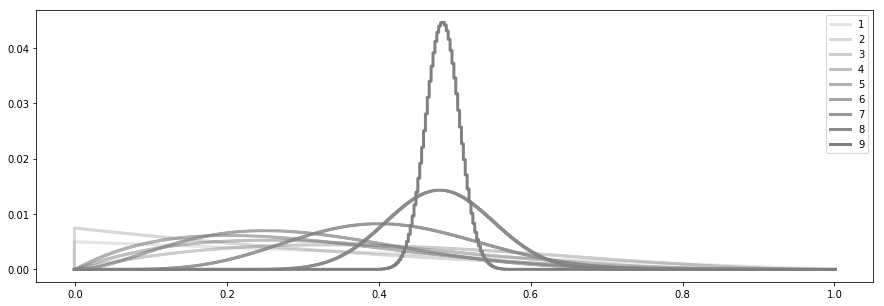

In [12]:
c.Update((0,1))
c.Update((0,1))
c.Update((1,0))
c.Update((0,1))
c.Update((0,1))
c.Update((1,2))
c.Update((4,3)) # 6 in 15
c.Update((18, 17)) # 24 in 50
c.Update((218, 232)) # 242 in 500
c.Show()

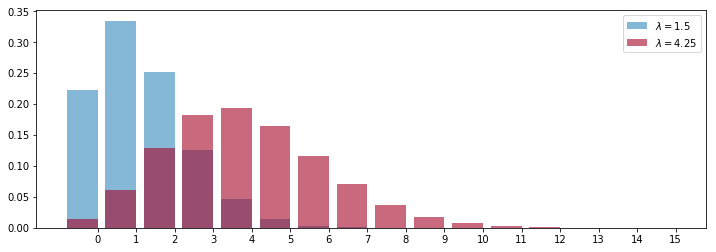

In [13]:
x = np.arange(16)
lambda_ = [1.5, 4.25]
colors = ["#348ABD","#A60628"]
plt.figure(figsize=(12,4))
plt.bar(x, scipy.stats.poisson.pmf(x, lambda_[0]), 
        color=colors[0], alpha=0.6, label="$\lambda={}$".format(lambda_[0]), lw="3")
plt.bar(x, scipy.stats.poisson.pmf(x, lambda_[1]), 
        color=colors[1], alpha=0.6, label="$\lambda={}$".format(lambda_[1]), lw="3")

plt.xticks(x+0.4, x)
plt.legend()
plt.show()

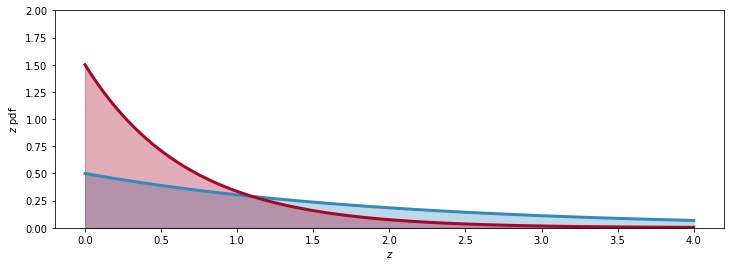

In [15]:
a = np.linspace(0,4,100)
lambda_ = [0.5, 1.5]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_, colors):
    plt.plot(a, scipy.stats.expon.pdf(a, scale=1/l), lw=3, color=c)
    plt.fill_between(a, scipy.stats.expon.pdf(a, scale=1/l), color=c, alpha=0.33)

plt.ylim(0,2)
plt.xlabel("$z$")
plt.ylabel("$z$ pdf")
plt.show()